In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import random
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Power_Consumption.csv')

In [3]:
data.head()

,Id,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1,4.216,0.418,234.84,18.4,0,1,17
1,2,5.360,0.436,233.63,23.0,0,1,16
2,3,5.374,0.498,233.29,23.0,0,2,17
3,4,5.388,0.502,233.74,23.0,0,1,17
4,5,3.666,0.528,235.68,15.8,0,1,17


In [4]:
df=data[["Voltage","Global_intensity"]]

In [5]:
df.head()


,Voltage,Global_intensity
0,234.84,18.4
1,233.63,23.0
2,233.29,23.0
3,233.74,23.0
4,235.68,15.8


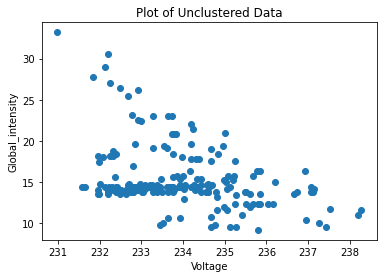

In [6]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.xlabel('Voltage')
plt.ylabel('Global_intensity')
plt.title('Plot of Unclustered Data')
plt.show()

In [7]:
num_of_centriod = 3
centroids=[]
init_centroids = random.sample(range(0, len(df)), num_of_centriod)
for i in init_centroids:
        centroids.append(df.loc[i])
centroids = np.array(centroids)
print('Randomly selected points as random_centroids:',centroids)

Randomly selected points as random_centroids: [[233.64  10.6 ]
 [235.84  13.6 ]
 [234.17  16.4 ]]


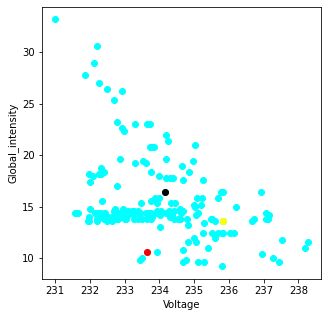

In [8]:
plt.figure(figsize=(5, 5))
plt.scatter(df.iloc[:,0], df.iloc[:,1], color='cyan')
length = len(centroids)
colors1=['r','yellow','black','g','b','cyan']
for i in range(length):
    plt.scatter(*centroids[i],color=colors1[i])
plt.xlabel('Voltage')
plt.ylabel('Global_intensity')
plt.show()

In [9]:
def assignment(df_new,random_centroids):
    for i in range(length) :
        #df_new['Distance from Centroid {}'.format(i)]=(np.sqrt((df_new.iloc[:,0] - random_centroids[i][0]) ** 2 + (df_new.iloc[:,1] - random_centroids[i][1]) ** 2))
        df_new['Distance from Centroid {}'.format(i)]=np.abs((df_new.iloc[:,0] - random_centroids[i][0])) + np.abs(df_new.iloc[:,1] - random_centroids[i][1]) 
    list1=[]
    list2=[]
    for a,b,c in zip(df_new['Distance from Centroid 0'],df_new['Distance from Centroid 1'],df_new['Distance from Centroid 2']):
        d = min(a,b,c)
        if d == a:
             list1.append(0)
             list2.append('r')
        elif d == b:
            list1.append(1)
            list2.append('g')
        else:
            list1.append(2)
            list2.append('b')
    df_new['Closest_Centroid'] = list1
    df_new['Color']=list2
    return df_new 

In [10]:
df_new = assignment(df,centroids)
df_new.head()

,Voltage,Global_intensity,Distance from Centroid 0,Distance from Centroid 1,Distance from Centroid 2,Closest_Centroid,Color
0,234.84,18.4,9.00,5.80,2.67,2,b
1,233.63,23.0,12.41,11.61,7.14,2,b
2,233.29,23.0,12.75,11.95,7.48,2,b
3,233.74,23.0,12.50,11.50,7.03,2,b
4,235.68,15.8,7.24,2.36,2.11,2,b


In [11]:
def update(parameter):
    for i in range(length):
        centroids[i][0] = np.mean(df_new[df_new['Closest_Centroid'] == i]['Voltage'])
        centroids[i][1] = np.mean(df_new[df_new['Closest_Centroid'] == i]['Global_intensity'])
       
    return parameter

In [12]:
centroids = update(centroids)
centroids

array([[235.1075    ,  10.2375    ],
       [234.28561644,  13.59178082],
       [233.4972973 ,  17.27207207]])

In [13]:
#List=np.array(List)
#List

Old Centroid [[235.11  10.24]
 [234.29  13.59]
 [233.5   17.27]]
New Centroid [[235.11  10.24]
 [234.29  13.59]
 [233.5   17.27]]
True


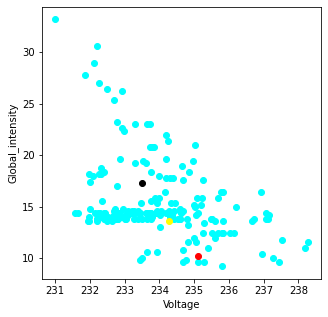

2


In [14]:
count=1
while True:
    old_random_centroids = np.round(centroids,2)
    print('Old Centroid',old_random_centroids)
    count+=1
    centroids= update(centroids)
    new_centroids = np.round(centroids,2)
    print('New Centroid',new_centroids)

    df_new = assignment(df, new_centroids)
    result=np.allclose(old_random_centroids,new_centroids)
    print(result)
    if result == True:
        plt.figure(figsize=(5, 5))
        plt.scatter(df.iloc[:,0], df.iloc[:,1], color='cyan')
        length = len(centroids)
        colors1=['r','yellow','black','g','b','cyan']
        for i in range(length):
            plt.scatter(*centroids[i],color=colors1[i])
        plt.xlabel('Voltage')
        plt.ylabel('Global_intensity')
        plt.show()
        break
print(count)


21
21


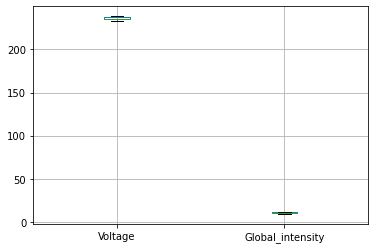

In [15]:
List=[]
for i in range(length):
    List=df_new.loc[df_new['Closest_Centroid'] == 0]
print(len(List))
col=["Voltage","Global_intensity"]
List.boxplot(col)

for x in ['Voltage']:
    q75,q25 = np.percentile(List.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    List.loc[List[x] < min,x] = np.nan
    List.loc[List[x] > max,x] = np.nan
for y in ['Global_intensity']:
    q75,q25 = np.percentile(List.loc[:,y],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    List.loc[List[y] < min,y] = np.nan
    List.loc[List[y] > max,y] = np.nan
List = List.dropna(axis = 0)
print(len(List))

127
114


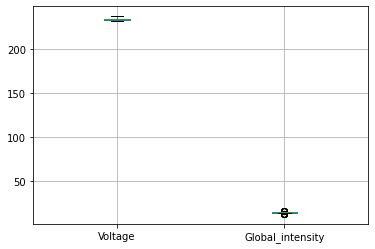

In [16]:
List2=[]
for i in range(length):
    List2=df_new.loc[df_new['Closest_Centroid'] == 1]
#print(List2.head())
print(len(List2))
col=["Voltage","Global_intensity"]
List2.boxplot(col)

for x in ['Voltage']:
    q75,q25 = np.percentile(List2.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    List2.loc[List2[x] < min,x] = np.nan
    List2.loc[List2[x] > max,x] = np.nan
for y in ['Global_intensity']:
    q75,q25 = np.percentile(List2.loc[:,y],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    List2.loc[List2[y] < min,y] = np.nan
    List2.loc[List2[y] > max,y] = np.nan
List2 = List2.dropna(axis = 0)
print(len(List2))

52
49


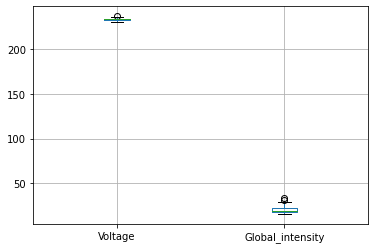

In [17]:
List3=[]
for i in range(length):
    List3=df_new.loc[df_new['Closest_Centroid'] == 2]
#print(List3.head())
print(len(List3))
col=["Voltage","Global_intensity"]
List3.boxplot(col)

for x in ['Voltage']:
    q75,q25 = np.percentile(List3.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    List3.loc[List3[x] < min,x] = np.nan
    List3.loc[List3[x] > max,x] = np.nan
for y in ['Global_intensity']:
    q75,q25 = np.percentile(List3.loc[:,y],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    List3.loc[List3[y] < min,y] = np.nan
    List3.loc[List3[y] > max,y] = np.nan
List3 = List3.dropna(axis = 0)
print(len(List3))